## 3.2 Neural Network (Feedforward Propogation)

A trained neural network parameters are given for a handwritten digits recognizer. Implement the feedforward propogation and predict the results.

### Import libraries

In [1]:
from scipy.io import loadmat

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Read the data

In [2]:
data = loadmat("ex3data1.mat")

X = data["X"]
y = data["y"]

### Visualize the data

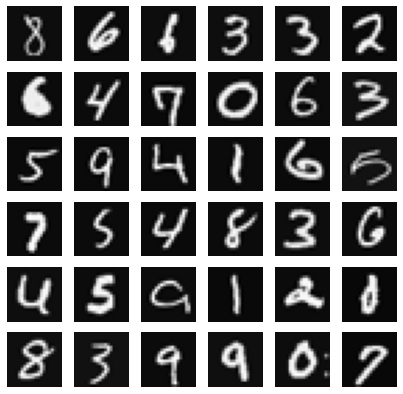

In [3]:
_, plots = plt.subplots(6, 6, figsize = (7, 7))
for i in range(6):
    for j in range(6):
        plots[i, j].imshow(X[np.random.randint(X.shape[0])].reshape((20, 20), order = "F"), cmap = "gray")
        plots[i, j].axis("off")

### Load saved neural network parameters

In [4]:
data_weights = loadmat("ex3weights.mat")

Theta1 = data_weights["Theta1"]
Theta2 = data_weights["Theta2"]

### Sigmoid function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Feedforward propogation

In [6]:
def predict(Theta1, Theta2, X):
    X = np.insert(X, 0, 1, axis = 1)
    Z2 = X @ Theta1.T
    A2 = sigmoid(Z2)
    A2 = np.insert(A2, 0, 1, axis = 1) # add intercept
    Z3 = A2 @ Theta2.T
    A3 = sigmoid(Z3)
    h = (np.argmax(A3, axis = 1) + 1)
    return h
    

### Accuracy of the model

In [7]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

pred = predict(Theta1, Theta2, X)

print("Train Accuracy: %5.3f" % (np.mean(pred == y.flatten()) * 100))

Train Accuracy: 97.520


### Show some random predictions

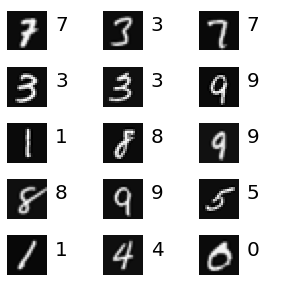

In [8]:
_, pred_plots = plt.subplots(5, 6, figsize = (5, 5))
for i in range(5):
    for j in range(0, 6, 2):
        random_num = np.random.randint(X.shape[0])
        random_X = X[random_num]
        random_pred = pred[random_num] % 10
        
        pred_plots[i, j].imshow(random_X.reshape((20, 20), order = "F"), cmap = "gray")
        pred_plots[i, j].axis("off")
        pred_plots[i, j+1].axis("off")
        pred_plots[i, j+1].text(0, 0.5, str(random_pred), fontsize = 20)
